In [5]:
#Step 1: Load Data file
import pandas as pd
import os
def current_path():
    os.chdir('c:/users/meenakshi ganesh/downloads/python-learn')
    print(os.getcwd())
    print()
current_path()
print(os.getcwd())

FilePath = 'c:/users/meenakshi ganesh/downloads/python-learn/Anova_Data.xlsx'
df = pd.read_excel(FilePath, sheet_name='two_way_rep')

c:\users\meenakshi ganesh\downloads\python-learn

c:\users\meenakshi ganesh\downloads\python-learn


In [31]:
#viewing loaded data
df = df.loc[:,['Day', 'News', 'Business', 'Sports']]
df

,Day,News,Business,Sports
0,Monday,11,10,4
1,Monday,8,12,3
2,Monday,6,13,5
3,Monday,8,11,6
4,Tuesday,9,7,5
5,Tuesday,10,8,8
6,Tuesday,10,11,6
7,Tuesday,12,9,7
8,Wednesday,8,7,5
9,Wednesday,9,8,9


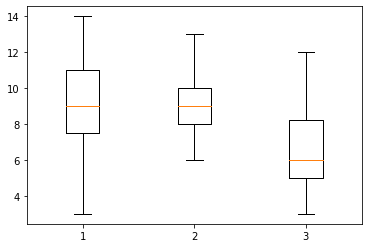

In [32]:
#Exploring Data

# Import libraries
import matplotlib.pyplot as plt

#dropping NaN values
df = df.dropna()

# Creating plot
plt.boxplot(df.loc[:,['News', 'Business', 'Sports']])

# show plot
plt.show()

In [35]:
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df, id_vars = ['Day'],value_vars=['News', 'Business', 'Sports'])
# replace column names
df_melt.columns = ['Weekday', 'Section', 'Responses']
df_melt=df_melt.dropna()
df_melt

,Weekday,Section,Responses
0,Monday,News,11
1,Monday,News,8
2,Monday,News,6
3,Monday,News,8
4,Tuesday,News,9
5,Tuesday,News,10
6,Tuesday,News,10
7,Tuesday,News,12
8,Wednesday,News,8
9,Wednesday,News,9


In [36]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Responses ~ C(Weekday)+C(Section)+C(Weekday):C(Section)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(Weekday),146.833333,4.0,20.909810,8.517535e-10
C(Section),53.733333,2.0,15.303797,8.502752e-06
C(Weekday):C(Section),135.766667,8.0,9.666930,1.124687e-07
Residual,79.000000,45.0,NaN,NaN


In [46]:
#post hoc test
import statsmodels.stats.multicomp as mc
df_melt['Weekday_Section'] = df_melt['Weekday'].map(str) + '_' + df_melt['Section'].map(str)
comp = mc.MultiComparison(df_melt['Responses'], df_melt['Weekday'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

comp = mc.MultiComparison(df_melt['Responses'], df_melt['Section'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

comp = mc.MultiComparison(df_melt['Responses'], df_melt['Weekday_Section'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Friday_Business,Friday_News,3.5,0.0338,0.1407,6.8593,True
Friday_Business,Friday_Sports,2.25,0.5234,-1.1093,5.6093,False
Friday_Business,Monday_Business,2.5,0.3572,-0.8593,5.8593,False
Friday_Business,Monday_News,-0.75,0.9,-4.1093,2.6093,False
Friday_Business,Monday_Sports,-4.5,0.0015,-7.8593,-1.1407,True
Friday_Business,Thursday_Business,-1.25,0.9,-4.6093,2.1093,False
Friday_Business,Thursday_News,-4.75,0.001,-8.1093,-1.3907,True
Friday_Business,Thursday_Sports,-3.0,0.125,-6.3593,0.3593,False
Friday_Business,Tuesday_Business,-0.25,0.9,-3.6093,3.1093,False
Friday_Business,Tuesday_News,1.25,0.9,-2.1093,4.6093,False


In [17]:
df_melt = df_melt.dropna()
df_melt.head(40)

,Sector,Returns
0,Auto,0.461650
1,Auto,0.320310
2,Auto,0.310449
3,Auto,0.256615
4,Auto,0.218900
5,Auto,0.141850
6,Auto,0.125700
7,Auto,0.024970
9,BFSI,0.782721
10,BFSI,0.218314
